### 2.1 Влияние размера ядра свертки 
Исследуйте влияние размера ядра свертки:
- 3x3 ядра
- 5x5 ядра
- 7x7 ядра
- Комбинация разных размеров (1x1 + 3x3)

Для каждого варианта:
- Поддерживайте одинаковое количество параметров
- Сравните точность и время обучения
- Проанализируйте рецептивные поля
- Визуализируйте активации первого слоя

In [103]:
import torch
from datasets import get_mnist_loaders, get_cifar_loaders
from modelsCNN import SimpleCNN, CNNWithResidual, CIFARCNN
from modelsFC import FullyConnectedModel
from trainer import train_model
from utils import plot_training_history, count_parameters, compare_models, plot_confusion_matrix
import time
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

In [104]:
class SimpleCNN(nn.Module):
    def __init__(self, input_channels=1, num_classes=10, kernel_size = 3):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size, 1, 1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size, 1, 1)
        self.pool = nn.MaxPool2d(2, 2)

        with torch.no_grad():
            x = torch.zeros(1, input_channels, 28, 28)
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            n_size = x.numel()  

        self.fc1 = nn.Linear(n_size, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.25)

    def conv(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        return x

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [105]:
class SimpleCNNTwoKernel(nn.Module):
    def __init__(self, input_channels=1, num_classes=10, kernel_size = 3):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size, 1, 1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)

        with torch.no_grad():
            x = torch.zeros(1, input_channels, 28, 28)
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            n_size = x.numel()  

        self.fc1 = nn.Linear(n_size, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.25)

    def conv(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        return x

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [106]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [107]:
train_loader, test_loader = get_mnist_loaders(batch_size=64)

In [108]:
simple_cnn_3 = SimpleCNN(input_channels=1, num_classes=10, kernel_size=3).to(device)
simple_cnn_5 = SimpleCNN(input_channels=1, num_classes=10, kernel_size=5).to(device)
simple_cnn_7 = SimpleCNN(input_channels=1, num_classes=10, kernel_size=7).to(device)
simple_cnn_1_3 = SimpleCNNTwoKernel(input_channels=1, num_classes=10).to(device)

models ={simple_cnn_3 : "3x3", 
         simple_cnn_5 : "5x5", 
         simple_cnn_7 : "7x7", 
         simple_cnn_1_3 : "1x1 and 3x3"}

Training CNN model...


100%|██████████| 157/157 [00:02<00:00, 76.86it/s]


Epoch 1/5:
Train Loss: 0.1622, Train Acc: 0.9500
Test Loss: 0.0402, Test Acc: 0.9864
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 83.46it/s]


Epoch 2/5:
Train Loss: 0.0543, Train Acc: 0.9832
Test Loss: 0.0297, Test Acc: 0.9903
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 82.86it/s]


Epoch 3/5:
Train Loss: 0.0389, Train Acc: 0.9879
Test Loss: 0.0287, Test Acc: 0.9910
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 78.91it/s]


Epoch 4/5:
Train Loss: 0.0291, Train Acc: 0.9909
Test Loss: 0.0272, Test Acc: 0.9915
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 78.81it/s]


Epoch 5/5:
Train Loss: 0.0238, Train Acc: 0.9923
Test Loss: 0.0239, Test Acc: 0.9925
--------------------------------------------------


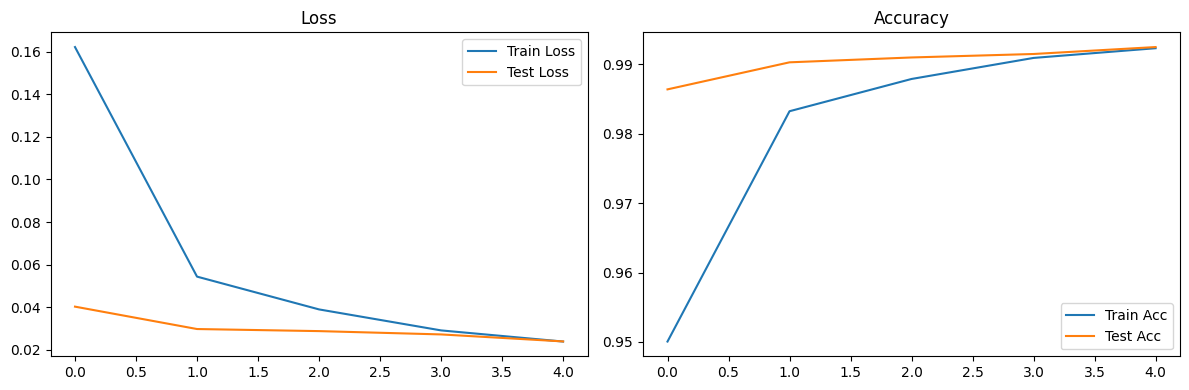

CNN 3x3 parameters: 421642
CNN time: 80.11436915397644
CNN 3x3 parameters: 421642
CNN time: 80.11436915397644
Training CNN model...


100%|██████████| 157/157 [00:01<00:00, 81.34it/s]


Epoch 1/5:
Train Loss: 0.1540, Train Acc: 0.9530
Test Loss: 0.0381, Test Acc: 0.9889
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 76.90it/s]


Epoch 2/5:
Train Loss: 0.0523, Train Acc: 0.9842
Test Loss: 0.0287, Test Acc: 0.9903
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 80.93it/s]


Epoch 3/5:
Train Loss: 0.0361, Train Acc: 0.9892
Test Loss: 0.0310, Test Acc: 0.9902
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 76.69it/s]


Epoch 4/5:
Train Loss: 0.0289, Train Acc: 0.9912
Test Loss: 0.0299, Test Acc: 0.9914
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 80.16it/s]


Epoch 5/5:
Train Loss: 0.0251, Train Acc: 0.9922
Test Loss: 0.0290, Test Acc: 0.9915
--------------------------------------------------


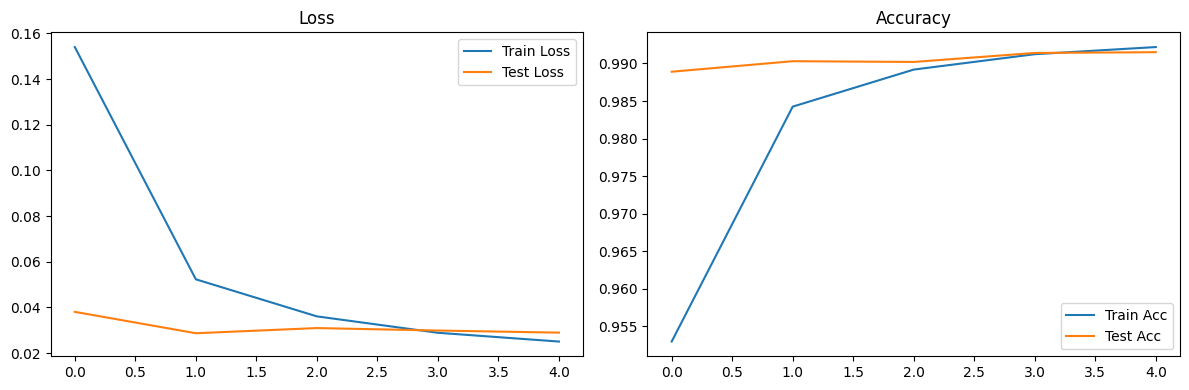

CNN 5x5 parameters: 258314
CNN time: 80.70959877967834
CNN 5x5 parameters: 258314
CNN time: 80.70959877967834
Training CNN model...


100%|██████████| 157/157 [00:02<00:00, 76.52it/s]


Epoch 1/5:
Train Loss: 0.1495, Train Acc: 0.9537
Test Loss: 0.0357, Test Acc: 0.9898
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 79.84it/s]


Epoch 2/5:
Train Loss: 0.0492, Train Acc: 0.9852
Test Loss: 0.0453, Test Acc: 0.9858
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 82.62it/s]


Epoch 3/5:
Train Loss: 0.0371, Train Acc: 0.9889
Test Loss: 0.0263, Test Acc: 0.9904
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 80.55it/s]


Epoch 4/5:
Train Loss: 0.0267, Train Acc: 0.9920
Test Loss: 0.0303, Test Acc: 0.9909
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 78.80it/s]


Epoch 5/5:
Train Loss: 0.0242, Train Acc: 0.9928
Test Loss: 0.0327, Test Acc: 0.9910
--------------------------------------------------


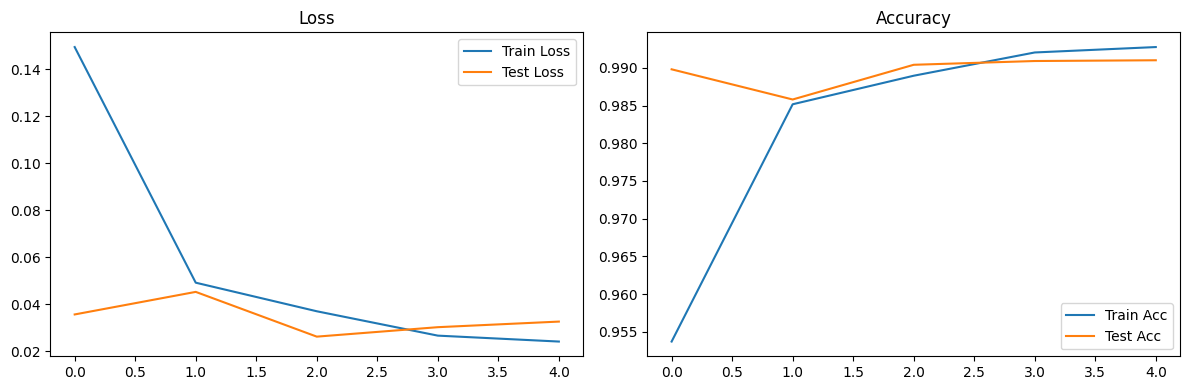

CNN 7x7 parameters: 234506
CNN time: 80.91414475440979
CNN 7x7 parameters: 234506
CNN time: 80.91414475440979
Training CNN model...


100%|██████████| 157/157 [00:01<00:00, 79.21it/s]


Epoch 1/5:
Train Loss: 0.4143, Train Acc: 0.8679
Test Loss: 0.1378, Test Acc: 0.9559
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 77.21it/s]


Epoch 2/5:
Train Loss: 0.1540, Train Acc: 0.9525
Test Loss: 0.0999, Test Acc: 0.9676
--------------------------------------------------


100%|██████████| 157/157 [00:01<00:00, 78.55it/s]


Epoch 3/5:
Train Loss: 0.1190, Train Acc: 0.9617
Test Loss: 0.0924, Test Acc: 0.9699
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 77.70it/s]


Epoch 4/5:
Train Loss: 0.0953, Train Acc: 0.9705
Test Loss: 0.0780, Test Acc: 0.9744
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 74.17it/s]


Epoch 5/5:
Train Loss: 0.0816, Train Acc: 0.9742
Test Loss: 0.0727, Test Acc: 0.9771
--------------------------------------------------


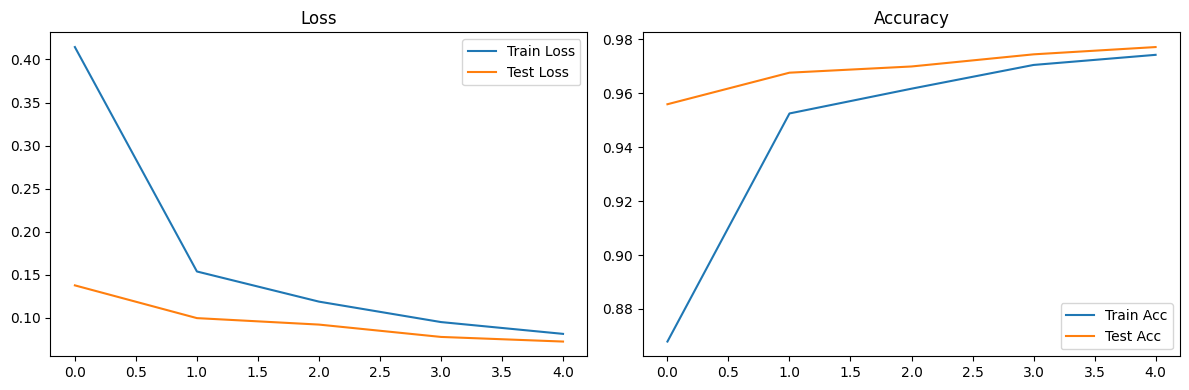

CNN 1x1 and 3x3 parameters: 53002
CNN time: 80.43526482582092
CNN 1x1 and 3x3 parameters: 53002
CNN time: 80.43526482582092


In [109]:
for model in models:
    params = times = {}
    params[f"CNN {models[model]} parameters:"] = count_parameters(model)
    print("Training CNN model...")
    start_train = time.time()
    cnn_history = train_model(model, train_loader, test_loader, epochs=5, device=str(device))
    end_train = time.time()
    times["CNN time:"] = end_train - start_train
    plot_training_history(cnn_history)
    for str_name in times: print(f"{str_name} {times[str_name]}")
    for str_name in params: print(f"{str_name} {params[str_name]}")

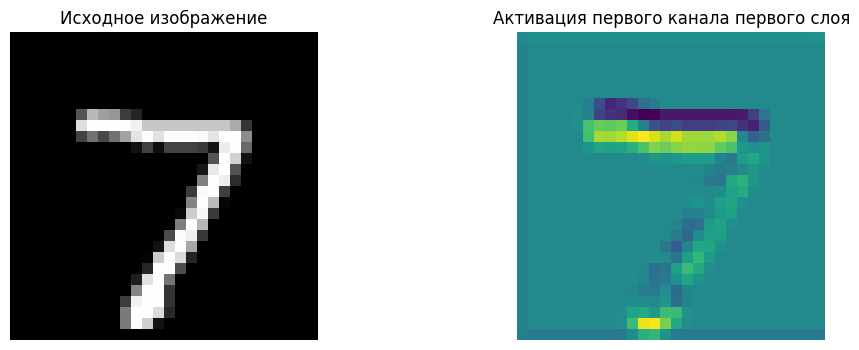

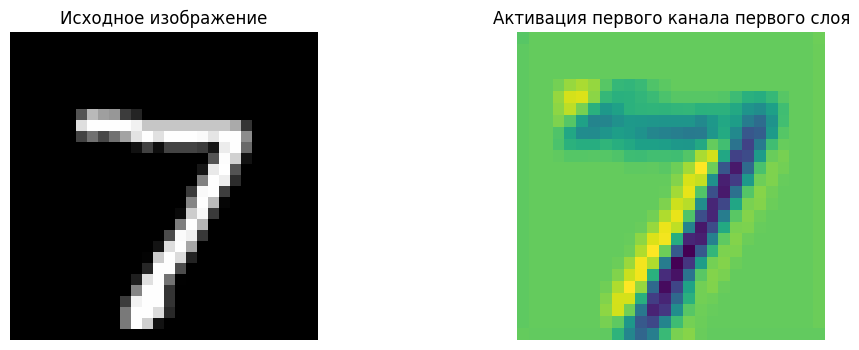

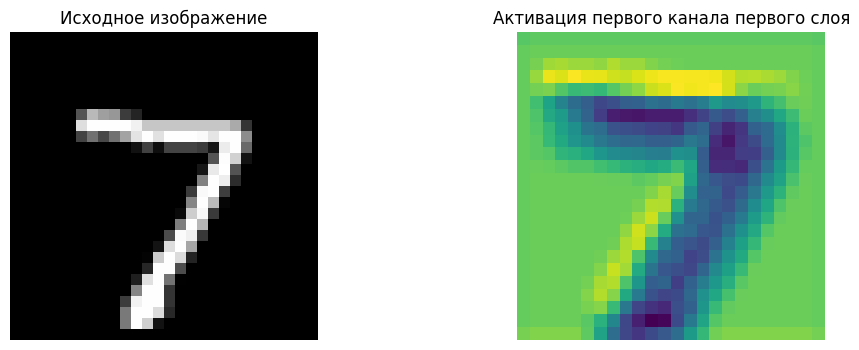

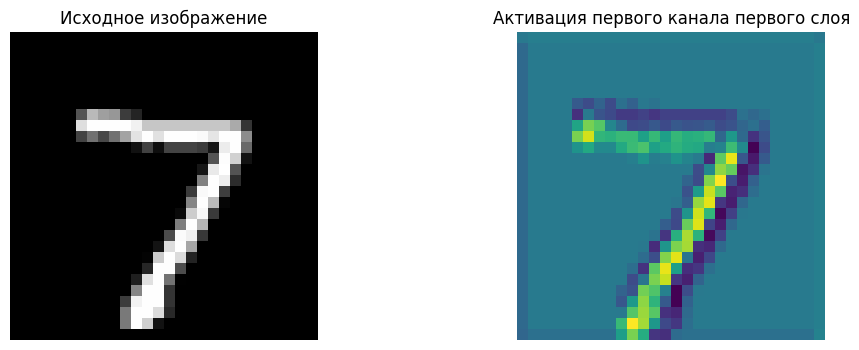

In [124]:
device = next(simple_cnn_3.parameters()).device

images, labels = next(iter(test_loader))
image = images[0].unsqueeze(0)  
image = image.to(device)        


for model in models:
    model.eval()

    with torch.no_grad():
        activation = model.conv1(image)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.imshow(image.squeeze().cpu(), cmap='gray')
    ax1.set_title("Исходное изображение")
    ax1.axis('off')
    act = activation.squeeze(0).cpu()  
    ax2.imshow(act[0], cmap='viridis')
    ax2.set_title("Активация первого канала первого слоя")
    ax2.axis('off')
    plt.show()
